# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Jimin Lee, Sarah He

Student ID: 508714, 508533

Collaborators:


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester, focussing on M0, M1, M2, and M6. 
> **Note:** You may do some supervised learning (as covered in M3 and M4), however, this should not be the _only_ thing(s) you do. We definitley want to see DS workflow/life-cycle (**M1**), lots of EDA (**M2**) and a discussion of ethical issues (**M6**):

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Linear Regression (if applicable - depends on problem/dataset)
* [M4] Linear Classification (if applicable - depends on problem/dataset)
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M6] Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class; you might want to also experiemnt with or use other packages. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend). 

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go. Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [1]:
# collaborators and sources:
#https://jacksonlab.agronomy.wisc.edu/2016/05/23/15-level-colorblind-friendly-palette/
#https://seaborn.pydata.org/generated/seaborn.catplot.html

# your code here
answer = 'my answer'

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the source/link given above and be sure to save the data in a folder called `data` under the `utility` directory. Your final path should look like `utility/data/rideshare_kaggle.csv` -- if it doesn't **we will not be able to properly grade your assignment!**

<!-- BEGIN QUESTION -->

### Problem 1

Let's start by taking a look at our data.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

The data contains information about rides in Boston, Massachusetts and the weather information corresponding to the day of the ride. The data is most likely from Uber and Lyft. The owner of the data does not specify how the data was obtained. There are 693071 examples and 57 features. Approximately half of the data is from Uber and the other half is from Lyft. The features describe each ride by its ride type, location, date, price, and weather-related information such as temperature, precipitation, and humidity. The features have a variety of data types, from integers and floats to objects like string. For example, source, timezone, destination features are in string, while weather-specific informations such as temperature, humidity, and precipIntensity are in float. The only feature with NaN values, however, is the price feature, where only 637976 out of 693071 are non-null. Some of the categorical features have categories that are not very interpretable, such as the 'product_id' which contains strings of letters and numbers in half of the category names. Another interesting is the time range of the data is between November and December, which explains why many weather-specific features such as temperature have small range. The ranges of latitude and longitude features are also small, most likely because the data only applies to rides in Boston, Massachusetts. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv('./utility/data/rideshare_kaggle.csv')
data.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
print(data.shape)
print(data.columns)

(693071, 57)
Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'app

In [5]:
# understand the data types of each feature
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [7]:
print(data['cab_type'].value_counts())

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64


In [8]:
# unique labels of 'product_id'
print(data['product_id'].value_counts())

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64


In [9]:
# the range of months in the data
print(f"The range of months in the data is from {data['month'].min()} to {data['month'].max()}")

The range of months in the data is from 11 to 12


In [10]:
# the features with range of less than 10 in their respective units:
print([i for i in data.select_dtypes(include = [np.number]).columns if (data[i].max() - data[i].min() < 10)])

['month', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'precipIntensity', 'precipProbability', 'humidity', 'visibility', 'cloudCover', 'uvIndex', 'visibility.1', 'moonPhase', 'precipIntensityMax']


In [11]:
# range of latitude and longitude values: 
print(data['latitude'].min(), data['latitude'].max())
print(data['longitude'].min(), data['longitude'].max())

42.2148 42.3661
-71.1054 -71.033


### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You should add comments and markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

In [88]:
clean_data = data.dropna()
sum(clean_data.isna().sum(axis=0))

0

We need to handle the NaN values identified in the 'price' feature. Dropping the rows with NaN values is not the most ideal, because they may provide imporant information. However, since the owner did not provide the source of the data or explain how he collected the data, dropping the rows is the best compromise now.

In [89]:
clean_data['datetime'][:5]

0    2018-12-16 09:30:07
1    2018-11-27 02:00:23
2    2018-11-28 01:00:22
3    2018-11-30 04:53:02
4    2018-11-29 03:49:20
Name: datetime, dtype: object

In [90]:
len(clean_data['datetime'].unique())

31350

In [91]:
datetime = pd.to_datetime(clean_data['datetime'])
date = datetime.dt.strftime('%m-%d')
clean_data.insert(loc = 0, column = 'date', value = date)
clean_data['date'][:5]

0    12-16
1    11-27
2    11-28
3    11-30
4    11-29
Name: date, dtype: object

The original datetime feature has 31350 unique values, which will be an obstacle when plotting time series plot. Therefore, we converted the values in the datetime feature to the 'datetime' data type in pandas and stripped the values to month and day, since the year is the same among all values. We also converted the dates to the days of the week and saved it as a column 'day_week'. 

In [17]:
drop_features = ['visibility.1', 'moonPhase', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'windGustTime', 'uvIndexTime', 
'icon', 'dewPoint', 'ozone', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'apparentTemperature',
'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'cloudCover',
 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'latitude', 'longitude', 'timezone', 'short_summary', 'long_summary', 'precipIntensityMax', 'precipIntensity', 'precipProbability']

In [18]:
clean_data = clean_data.drop(labels = drop_features, axis = 1)

In [19]:
clean_data.columns

Index(['day_week', 'date', 'id', 'timestamp', 'hour', 'day', 'month',
       'datetime', 'source', 'destination', 'cab_type', 'product_id', 'name',
       'price', 'distance', 'surge_multiplier', 'temperature', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'pressure', 'windBearing',
       'uvIndex', 'sunriseTime', 'sunsetTime'],
      dtype='object')

We found that there are some repetitive features in the weather data, like 'visibility' and 'visibility.1', that could be dropped from the data. There are also a lot of deatiled features about the temperature, but they all have similar distributions, so we decide to only use the general 'temperature' feature and drop the other ones. For features related to precipitation, most of the values are 0, so we could drop them. Features like 'latitude', 'longitude', and 'timezone' have very similar values for all the examples in the dataset because all the data are collected in Boston, so they are not really informative and also dropped from the data. In addition, some features, such as 'moonphase' and 'ozone', seem to be irrelavent to the distance and price of cab rides, so we also drop these.

### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

In [20]:
heatmap_features = ['price', 'surge_multiplier', 'temperature', 'humidity', 'windSpeed', 'windGust', 'visibility', 'pressure', 'windBearing', 'uvIndex',
'sunriseTime', 'sunsetTime']

In [21]:
heatmap_data = clean_data[heatmap_features].corr(numeric_only=True)

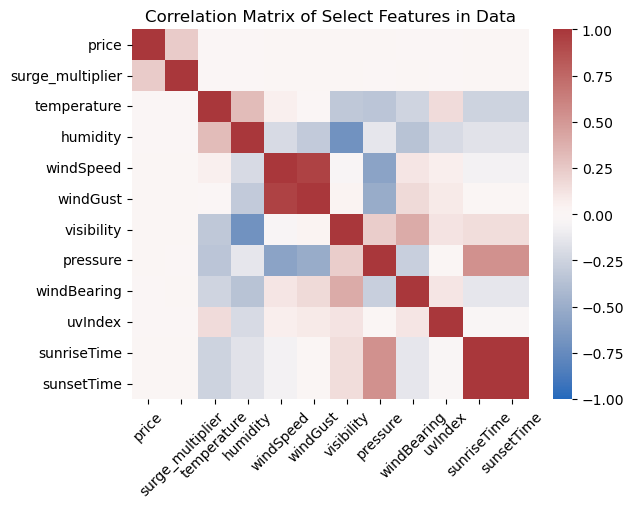

In [56]:
sns.heatmap(heatmap_data, cmap=sns.cm.vlag, vmin=-1)
plt.xticks(rotation=45)
plt.title('Correlation Matrix of Select Features in Data')
plt.show()

From the correlation matrix, none of the weather features has correlation with 'price' and 'surge_multiplier'.

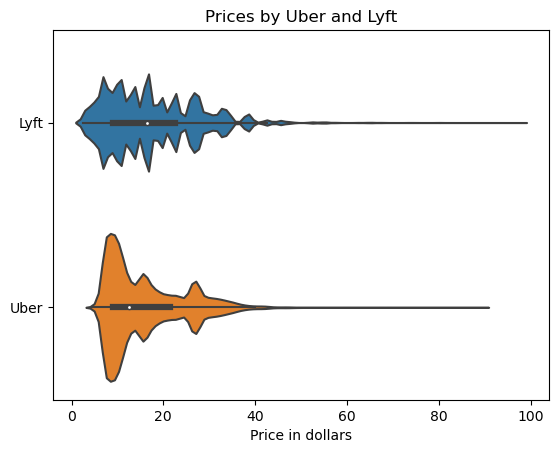

In [23]:
sns.violinplot(data = clean_data, x = 'price', y = 'cab_type')
plt.title("Prices by Uber and Lyft")
plt.xlabel("Price in dollars")
plt.ylabel("")
plt.show()

In [47]:
uber_data = clean_data[clean_data['cab_type'] == 'Uber']
lyft_data = clean_data[clean_data['cab_type'] == 'Lyft']

In [53]:
print(f"Uber: from ${uber_data['price'].min()} to ${uber_data['price'].max()}")
print(f"Lyft: from ${lyft_data['price'].min()} to ${lyft_data['price'].max()}")

Uber: from $4.5 to $89.5
Lyft: from $2.5 to $97.5


In [24]:
uber_median = uber_data['price'].median()
lyft_median = lyft_data['price'].median()
lyft_median - uber_median

4.0

In [48]:
uber_mean = uber_data['price'].mean()
lyft_mean = lyft_data['price'].mean()
lyft_mean - uber_mean

1.5560529581068039

The distribution of prices in Uber and Lyft are similar. Their median values only differ by 4 dollars and their mean values have difference of less than 2 dollars. Although they are small differences, Lyft has both a higher median and higher mean price vaue. This is because as the violin plot shows, the price distribution of Uber rides are heavily clustered on the lower end, while the price distribution of Lyft rides are more spread out. The plot also shows that Lyft rides have a greater range. Our initial assumption is that many Lyft rides traveled more distances, since intuitively, distance would correlate with prices.

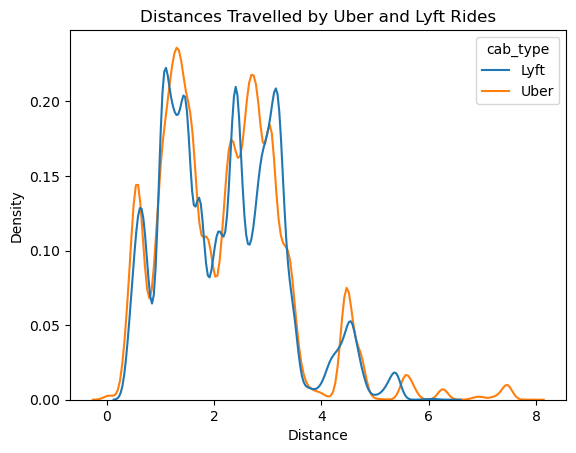

In [36]:
sns.kdeplot(data = clean_data, x = 'distance', hue = 'cab_type')
plt.title("Distances Travelled by Uber and Lyft Rides")
plt.xlabel('Distance')
plt.show()

In [51]:
print(f"Uber: from {uber_data['distance'].min()} miles to {uber_data['distance'].max()} miles")
print(f"Lyft: from {lyft_data['distance'].min()} miles to {lyft_data['distance'].max()} miles")

Uber: from 0.02 miles to 7.86 miles
Lyft: from 0.39 miles to 6.33 miles


From the density plot, we can see that the distributions of distance travelled by Uber and Lyft are similar, with the majority of rides having a distance below 4 miles. The plot shows us that Uber has a greater range of distances travelled compared to Lyft. This was unexpected, because in the violin plot of prices, we saw that Lyft has a greater range of prices. Since we thought that distance would strictly correlate with prices, we were expecting Lyft to have a greater range of distances, too.

We then looked at the distribution of source and destination pairs in the data

In [38]:
clean_data.groupby(['price','source', 'destination']).count().reset_index()[['price', 'source','destination','id']].sort_values(ascending = False, by='id')[:5]

,price,source,destination,id
421,7.0,Haymarket Square,North Station,2051
417,7.0,Financial District,South Station,1952
444,7.0,South Station,Financial District,1837
432,7.0,North Station,Haymarket Square,1831
420,7.0,Haymarket Square,Financial District,1809


The trips from Haymarket Square to North Station has the greatest frequency at 2051 along all trips included in the data. Since there are multiple combinations of source and destination that represet the trips, we decided to get a glimpse of how Uber and Lyft rides are distributed across the sources by looking at the specific trip from Haymarket Square to North Station. 

In [40]:
haymarket_to_north = clean_data[(clean_data['source'] == 'Haymarket Square') & (clean_data['destination'] == 'North Station')]

In [46]:
haymarket_to_north['cab_type'].value_counts()

Uber    4560
Lyft    4314
Name: cab_type, dtype: int64

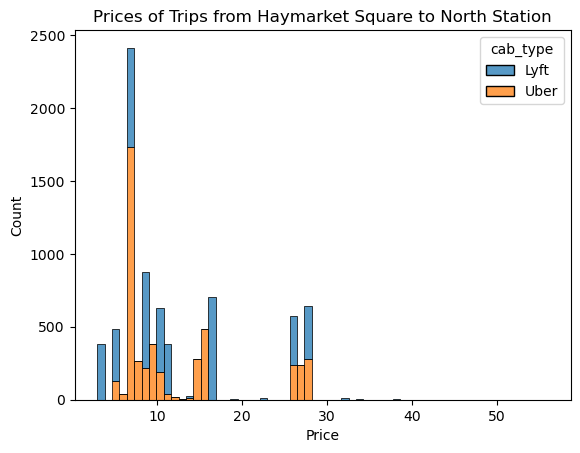

In [59]:
sns.histplot(data = haymarket_to_north, x = 'price', hue = 'cab_type', multiple = 'stack')
plt.title("Prices of Trips from Haymarket Square to North Station")
plt.xlabel("Price")
plt.show()

The peak of the distribution is at 7 dollars, which we expected when we calculated the most frequent trip in the data and discovered it to be from the $7 trip from Haymarket Square to North Station. Interestingly, the distribution of Lyft rides appear to be more spread out across the price range, while the Uber rides appear to be centered at the peak value of 7 dollars. The Uber prices also more appear to be continuous compared to the Lyft prices. Since this histogram only examines one type of route, we want to explore if this pattern is observed across the data.

We lastly plotted the change in prices across time in Uber and Lyft rides.

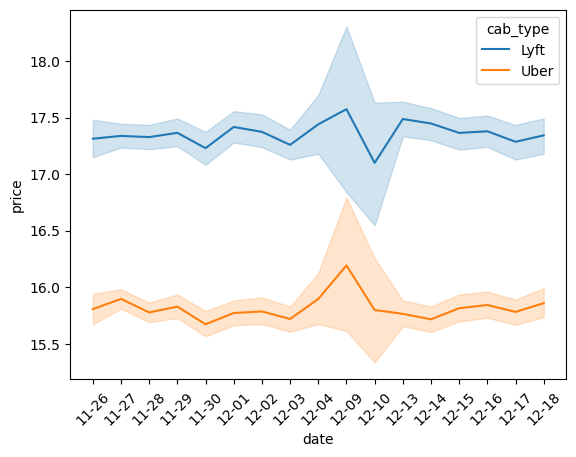

In [92]:
line_data = clean_data.sort_values(by = 'date')
sns.lineplot(data = line_data, x = 'date', y='price', hue = 'cab_type')
plt.title("Distribution of Price vs Date in Uber and Lyft")
plt.xlabel("Date (M-D)")
plt.ylabel("Price")
plt.xticks(rotation = 45)
plt.show()

The fluctuation in prices in Uber and Lyft rides appear to be the same. They both peaked on 12/09 but maintained constant average price across the dates. Uber has higher mean price value than Lyft, as discussed above. 

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

**Answer here:** 

From the steps above, we found that Uber has a greater range of travel distances, but Lyft has a greater range of prices. We want to know why it is the case since it is counter intuitive. We think that distances, surge multipliers, cab types, and certain weather conditions may all contribute to the difference in prices in Uber and Lyft, which untimately gives rise to the discrepency in the ranges of distances and prices.

Our question asks if the difference in prices of Uber and Lyft is influenced by distances, surge multipliers, ride types, and certain weather conditions.

We hypothesize that distances, surge multipliers, ride types, and certain weather conditions all influence the difference in prices of Uber and Lyft but probably in different ways and to different extents.

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

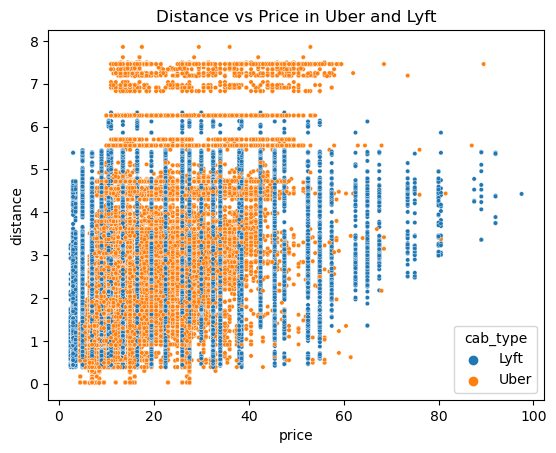

In [66]:
sns.scatterplot(data = clean_data, x = 'price', y = 'distance', hue = 'cab_type', s = 10)
plt.title("Distance vs Price in Uber and Lyft")
plt.show()

We first graphed the scatter plot of price values versus distance. The Uber and Lyft prices seemed to follow two distinguished patterns. The Lyft prices appear to be more vertically distributed while the Uber prices appear to be more horizontally distributed. Interestingly, this connects back to the bar plot above describing the price distribution in the trips from Haymarket Square to North Station. In that bar plot, the distribution of Lyft prices appeared to be more spread out and almost discrete while the Uber prices peaked at a lower price value and appeared more continous. The scatterplot reflects the same pattern. The gaps between the Lyft price values make the distribution appear  vertical, as if they are discrete bar plots, and the length of those vertical lines are nearly equal for prices, with the exception of high price values above 60 dollars, meaning that the different price values are approxiately equally distributed. The Uber prices, on the other hand, have no visible gaps between the price values, as continuous variables should, and seem to be clustered near the lower end of prices, which indicates that the price distribution in other sources most likely peak at lower price values as in the bar plot of prices in trips from Haymarket Square to North Station. 

To better understand the difference in the price distribution between Uber and Lyft, we looked at their surge multiplier.

In [63]:
uber_data['surge_multiplier'].value_counts()

1.0    330568
Name: surge_multiplier, dtype: int64

In [64]:
lyft_data['surge_multiplier'].value_counts()

1.00    286433
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

At least in the trips collected by the data, Uber charges constant prices, while Lyft has multiple surge multiplier values, indicating that they charge different prices based on the other conditions. We distinguished the effect of surge multiplier value by assigning it as the color feature in the same scatterplot between price and distance.

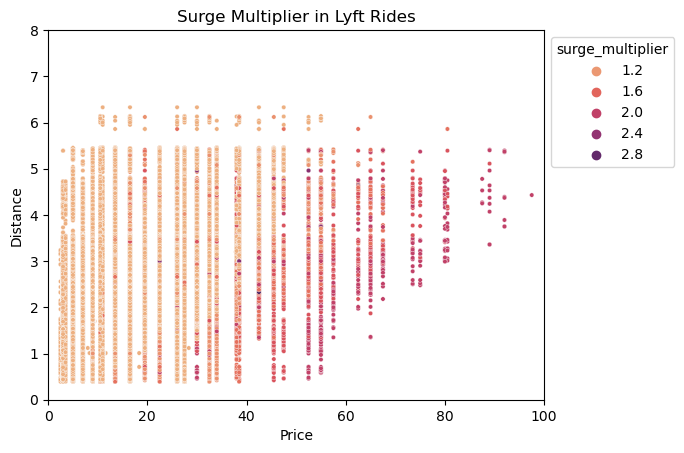

In [68]:
lyft_surge = sns.scatterplot(data = lyft_data, x = 'price', y = 'distance', hue = 'surge_multiplier', palette= "flare", s = 10)
sns.move_legend(lyft_surge, "upper left", bbox_to_anchor=(1, 1))
plt.title("Distribution of Surge Multiplier in Lyft Rides")
plt.xlabel("Price")
plt.ylabel("Distance")
plt.xlim((0, 100))
plt.ylim((0, 8))
plt.show()

The data shows that the prices above 40 dollars are generally affected by the surge multiplier. 

Because the ride types of Uber and Lyft are different, we assigned common names, the same way we assigned them common colors in the scatter plot above. We grouped the ride types by their similarity in price distribution and functionality, so UberPool with Shared, UberX with Lyft, UberXL with Lux, WAV with Lyft XL, Black with Lux Black, and Black SUV with Lux Black XL. 

In [60]:
uber_ride_type = uber_data['name'].map({'UberPool':'Type 1', 'UberX': 'Type 2',  'WAV': 'Type 3', 'UberXL': 'Type 4', 'Black':'Type 5', 'Black SUV':'Type 6'})
uber_data.insert(loc = 0, column = 'ride_type', value = uber_ride_type)

lyft_ride_type = lyft_data['name'].map({'Shared':'Type 1', 'Lyft': 'Type 2', 'Lyft XL': 'Type 3', 'Lux': 'Type 4', 'Lux Black':'Type 5', 'Lux Black XL':'Type 6'})
lyft_data.insert(loc = 0, column = 'ride_type', value = lyft_ride_type)

In [61]:
combined_data = pd.concat([uber_data,lyft_data])
column_order = [f'Type {i}' for i in range(1,7)]

In [ ]:
sns.lmplot(data = combined_data, x = 'price', y = 'distance', hue = 'cab_type', col = 'ride_type', col_order = column_order, height = 3, col_wrap = 3, scatter = False)
plt.title("Price vs Distance by Ride Types in Uber and Lyft")
plt.xlabel("Price")
plt.ylabel("Distance")
plt.xlim((0, 100))
plt.ylim((0, 8))
plt.show()

The linear regression model plotted above confirms that in general, as the ride type increases in size and improves in functionality, the slope of the price vs distance distribution gets steeper, especially Lyft with its surge multiplier policy. Therefore, the linear regression model predicts that as distance increases, the price charged by Lyft increases more than the price charged by Uber increases. 

Lastly, we examined if there is a relationship between the temperature and the distribution of cab type (Uber or Lyft).

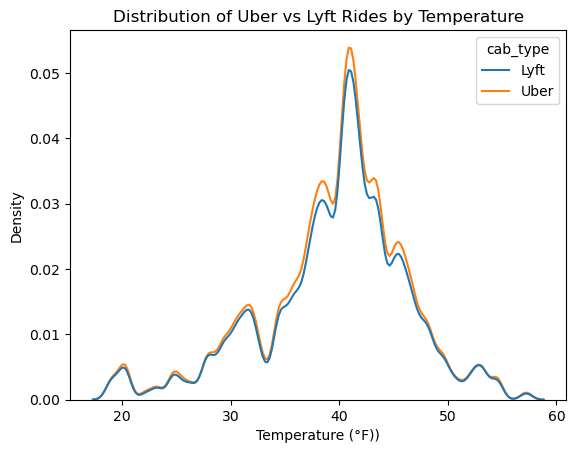

In [98]:
sns.kdeplot(data = clean_data, x = 'temperature', hue = 'cab_type')
plt.title("Distribution of Uber and Lyft Rides vs Temperature")
plt.xlabel("Temperature (°F))")
plt.ylabel("Density")
plt.show()

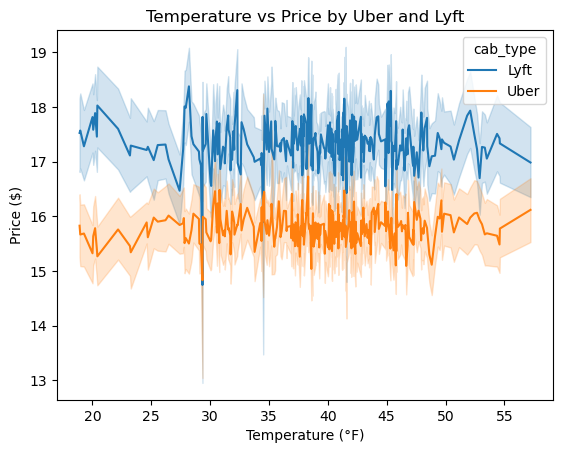

In [97]:
sns.lineplot(data = clean_data, x = 'temperature', y='price', hue = 'cab_type')
plt.title("Temperature vs Price in Uber and Lyft")
plt.xlabel("Temperature (°F)")
plt.ylabel("Price ($)")
plt.show()

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

**Answer here:**

According to the evidences we found, the price would be more expensive for Lyft than Uber when travelling long distances.

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

**Answer here:** (feel free to make multiple cells!)

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

**Answer here:** (feel free to make multiple cells!)

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

### Submission instructions
* Check to make sure that your code runs without error on a fresh kernel. Within jupyter, **Kernel -> Restart & Run All**. 
* **Save your notebook!**
* Submit this Python notebook, including your answers in the code cells as homework submission. **Be sure to add your partner to the submission as well**.
* After submitting, navigate to the **code tab** to view your submission. Verify that all your write-ups, markdown cells, and visualizations appear correctly on Gradescope. This is the **exact** view the graders will see when grading your work, so make sure that everything looks as expected.